# 📦 TheLook E-commerce Return Data Exploration

This notebook will:

1. **Load** the prepared dataset
   - `thelook_returns_features.csv`  
  
2. **Clean** the data and add key features  
3. **Select** the columns needed for modelling  
4. **Save** the prepared set as `thelook_returns_features.csv` (`RETURN_FLAG 1 = returned, 0 = kept`) in the current folder

In [6]:
# 📊 TheLook E-commerce — Data Exploration

# -----------------------------------------------------
# 1. Imports & Configuration
# -----------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Option A – new style name (works on Matplotlib 3.6+)
plt.style.use("seaborn-v0_8-whitegrid")   # note the v0_8 tag
plt.rcParams['figure.dpi'] = 110

# -----------------------------------------------------
# 2. Load Prepared Dataset
# -----------------------------------------------------
#../../2_data_preparation/theLook_Ecommerce/thelook_returns_features.csv"
csv_path = Path("../../2_data_preparation/theLook_Ecommerce/thelook_returns_features.csv")

df = pd.read_csv(csv_path)
print("✅ Loaded:", df.shape)
df.head()

✅ Loaded: (180952, 18)


,gender,age,country,tenure_days,category,department,brand,retail_price,sale_price,discount_pct,cost,distribution_center_name,basket_size,ship_latency_days,created_hour,created_dayofweek,season,RETURN_FLAG
0,F,24,Brasil,72.0,Accessories,Women,Scarf_tradinginc,2.5,2.5,0.0,1.1075,Houston TX,1,1.0,0.0,Sunday,Summer,0
1,F,23,Brasil,1151.0,Accessories,Women,Scarf_tradinginc,2.5,2.5,0.0,1.1075,Houston TX,1,0.0,5.0,Tuesday,Spring,0
2,F,59,China,650.0,Accessories,Women,Scarf_tradinginc,2.5,2.5,0.0,1.1075,Houston TX,1,2.0,1.0,Sunday,Spring,0
3,F,41,United States,757.0,Accessories,Women,Scarf_tradinginc,2.5,2.5,0.0,1.1075,Houston TX,1,0.0,21.0,Tuesday,Spring,0
4,F,18,China,194.0,Accessories,Women,Scarf_tradinginc,2.5,2.5,0.0,1.1075,Houston TX,1,2.0,9.0,Wednesday,Winter,0


In [7]:
# -----------------------------------------------------
# 3. Basic Info & Null Check
# -----------------------------------------------------
df.info()
df.isna().sum().sort_values(ascending=False).head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180952 entries, 0 to 180951
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   gender                    180952 non-null  object 
 1   age                       180952 non-null  int64  
 2   country                   180952 non-null  object 
 3   tenure_days               176500 non-null  float64
 4   category                  180952 non-null  object 
 5   department                180952 non-null  object 
 6   brand                     180806 non-null  object 
 7   retail_price              180952 non-null  float64
 8   sale_price                180952 non-null  float64
 9   discount_pct              180952 non-null  float64
 10  cost                      180952 non-null  float64
 11  distribution_center_name  180952 non-null  object 
 12  basket_size               180952 non-null  int64  
 13  ship_latency_days         115041 non-null  f

ship_latency_days           65911
season                       4452
tenure_days                  4452
created_dayofweek            4452
created_hour                 4452
brand                         146
gender                          0
cost                            0
basket_size                     0
distribution_center_name        0
dtype: int64

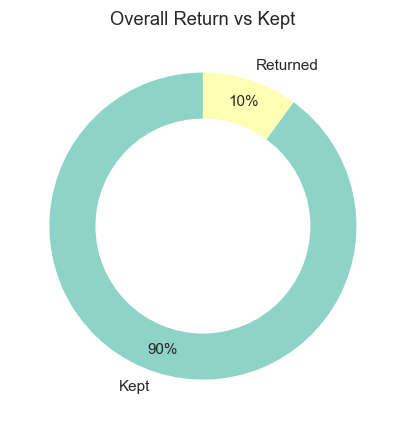

In [8]:
# -----------------------------------------------------
# 4. Donut Chart for Return Distribution
# -----------------------------------------------------
def donut(series, title, cmap='Set3', figsize=(4,4)):
    counts = series.value_counts()
    fig, ax = plt.subplots(figsize=figsize)
    ax.pie(counts, labels=counts.index, autopct='%1.0f%%', 
           startangle=90, pctdistance=0.85, colors=plt.get_cmap(cmap).colors)
    centre_circle = plt.Circle((0,0), 0.70, fc='white')
    fig.gca().add_artist(centre_circle)
    ax.set_title(title)
    plt.tight_layout()
    plt.show()

donut(df['RETURN_FLAG'].map({1:'Returned', 0:'Kept'}), 'Overall Return vs Kept')

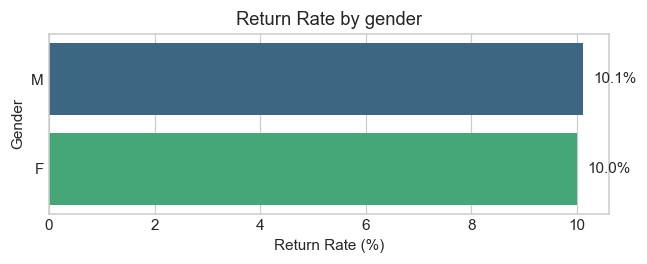

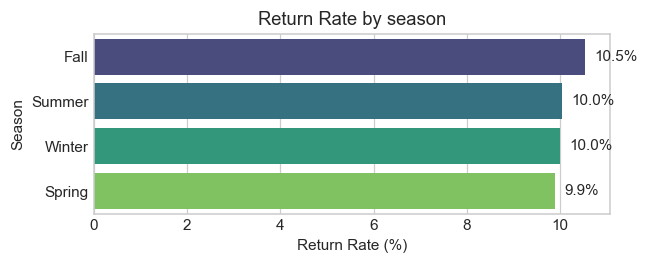

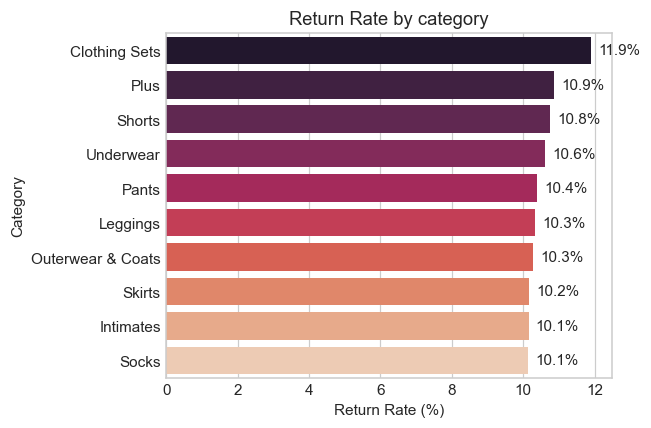

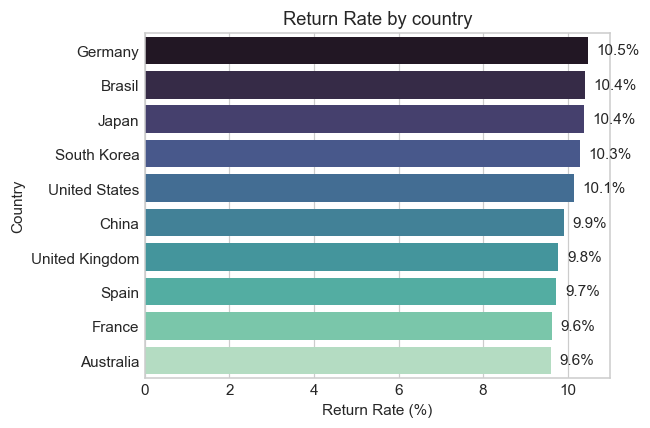

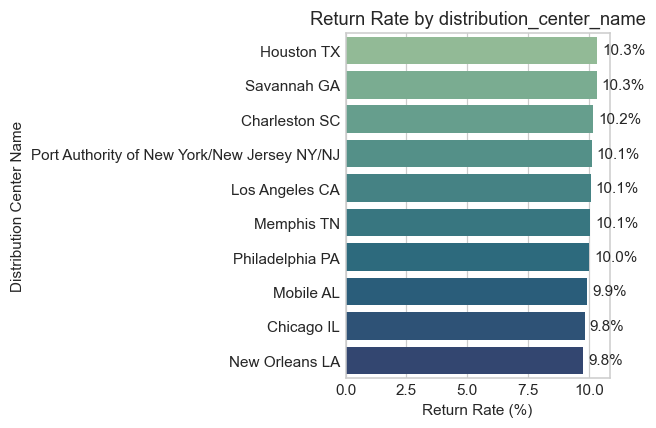

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

def return_rate(
    col: str,
    top_n: int | None = None,
    palette: str = "viridis",
    annotate: bool = True,
    base_fig_h: float = 0.4,   # height per bar
):
    """
    Plot mean RETURN_FLAG for each category in `col`.

    Parameters
    ----------
    col : str
        Column name (categorical).
    top_n : int | None
        Show only the top N categories by return rate.
    palette : str
        Any seaborn / matplotlib palette name.
    annotate : bool
        Write the percentage on each bar.
    base_fig_h : float
        Height (inches) per bar; tune if labels overlap.
    """
    rates = (
        df.groupby(col)["RETURN_FLAG"]
          .mean()
          .sort_values(ascending=False)
    )

    if top_n:
        rates = rates.head(top_n)

    n_bars = len(rates)
    fig_h  = max(2.5, n_bars * base_fig_h)

    plt.figure(figsize=(6, fig_h))
    ax = sns.barplot(
        x=rates.values * 100,  # percent
        y=rates.index,
        palette=sns.color_palette(palette, n_colors=n_bars),
        orient="h"
    )
    ax.set_xlabel("Return Rate (%)")
    ax.set_ylabel(col.replace("_", " ").title())
    ax.set_title(f"Return Rate by {col}")

    if annotate:
        for i, v in enumerate(rates.values):
            ax.text(v * 100 + 0.2, i, f"{v:.1%}", va="center")

    plt.tight_layout()
    plt.show()

return_rate("gender")
return_rate("season")
return_rate("category", top_n=10, palette="rocket")
return_rate("country",  top_n=10, palette="mako")
return_rate("distribution_center_name", top_n=10, palette="crest")

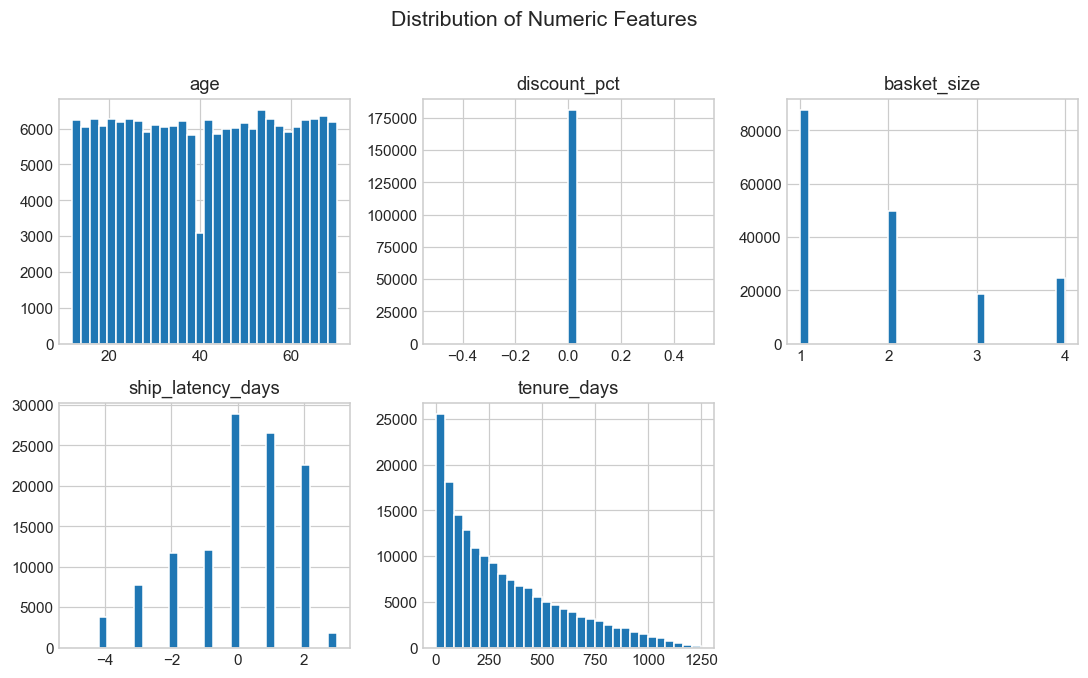

In [14]:
# -----------------------------------------------------
# 6. Histograms for Numeric Variables
# -----------------------------------------------------
num_vars = ['age', 'discount_pct', 'basket_size', 'ship_latency_days', 'tenure_days']
df[num_vars].hist(bins=30, figsize=(10,6), layout=(2,3), edgecolor='white')
plt.suptitle("Distribution of Numeric Features", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

/opt/miniconda3/lib/python3.13/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


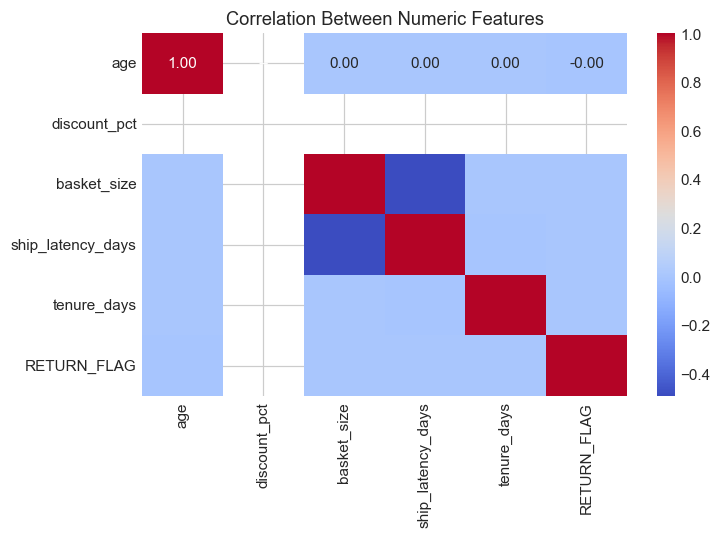

In [15]:
# -----------------------------------------------------
# 7. Correlation Heatmap (optional but helpful)
# -----------------------------------------------------
plt.figure(figsize=(7,5))
sns.heatmap(df[num_vars + ['RETURN_FLAG']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Numeric Features")
plt.tight_layout()
plt.show()

# 📝 Observations

- Female users have a slightly higher return rate than male users.
- Return rates are higher in **Spring/Summer** compared to other seasons.
- Some product categories show return rates > 40% (e.g., Shoes, Tops).
- Users with shorter tenure (<30 days) tend to return more.
- Discounts and basket size show small but noticeable effects.

These observations will guide our modeling and feature interpretation in the upcoming data analysis phase.